In [2]:
import numpy as np 
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 15) 
pd.set_option('display.max_rows', 50)

import seaborn as sns
import matplotlib.pyplot as plt

# load data

In [3]:
new_train_df = pd.read_csv("../data/new_train.csv")
new_train_df = new_train_df.drop(columns=['id'])
original_train_df = pd.read_csv("../data/original_train.csv")
train_df = pd.concat([new_train_df, original_train_df])
# train_df.to_csv('../data/train.csv')

test_df = pd.read_csv("../data/new_test.csv")
test_df = test_df.drop(columns=['id'])

submission_df = pd.read_csv("../submission/sample_submission.csv")

# analyze data

In [31]:
def analyze_dataframe(df):
    print("DataFrame Shape:")
    print("----------------")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\n")

    print("DataFrame Information:")
    print("----------------------")
    display(df.info())
    print("\n")

    print("DataFrame Values:")
    print("-----------------")
    display(df.head(5).T)
    print("\n")

    print("DataFrame Description:")
    print("----------------------")
    display(df.describe().T)
    print("\n")

    print("Number of Duplicated Rows:")
    print("--------------------------")
    display(df.duplicated().sum())
    print("\n")

    print("Number of Null Values:")
    print("----------------------")
    display(df.isnull().sum())
    print("\n")

    print("Number of Unique Values:")
    print("------------------------")
    display(df.nunique())
    print("\n")

analyze_dataframe(train_df)

DataFrame Shape:
----------------
Rows: 198240, Columns: 23


DataFrame Information:
----------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 198240 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  198240 non-null  int64  
 1   height(cm)           198240 non-null  int64  
 2   weight(kg)           198240 non-null  int64  
 3   waist(cm)            198240 non-null  float64
 4   eyesight(left)       198240 non-null  float64
 5   eyesight(right)      198240 non-null  float64
 6   hearing(left)        198240 non-null  int64  
 7   hearing(right)       198240 non-null  int64  
 8   systolic             198240 non-null  int64  
 9   relaxation           198240 non-null  int64  
 10  fasting blood sugar  198240 non-null  int64  
 11  Cholesterol          198240 non-null  int64  
 12  triglyceride         198240 non-null  int64  
 13  HDL         

None



DataFrame Values:
-----------------


,0,1,2,3,4
age,55.0,70.0,20.0,35.0,30.0
height(cm),165.0,165.0,170.0,180.0,165.0
weight(kg),60.0,65.0,75.0,95.0,60.0
waist(cm),81.0,89.0,81.0,105.0,80.5
eyesight(left),0.5,0.6,0.4,1.5,1.5
eyesight(right),0.6,0.7,0.5,1.2,1.0
hearing(left),1.0,2.0,1.0,1.0,1.0
hearing(right),1.0,2.0,1.0,1.0,1.0
systolic,135.0,146.0,118.0,131.0,121.0
relaxation,87.0,83.0,75.0,88.0,76.0




DataFrame Description:
----------------------


,count,mean,std,min,25%,50%,75%,max
age,198240.0,44.271418,11.886308,20.0,40.0,40.0,55.0,85.0
height(cm),198240.0,165.153375,8.895587,130.0,160.0,165.0,170.0,190.0
weight(kg),198240.0,66.906709,12.656868,30.0,55.0,65.0,75.0,135.0
waist(cm),198240.0,82.817163,9.039363,51.0,77.0,83.0,89.0,129.0
eyesight(left),198240.0,1.007599,0.422827,0.1,0.8,1.0,1.2,9.9
eyesight(right),198240.0,1.002519,0.414241,0.1,0.8,1.0,1.2,9.9
hearing(left),198240.0,1.024248,0.153820,1.0,1.0,1.0,1.0,2.0
hearing(right),198240.0,1.023966,0.152943,1.0,1.0,1.0,1.0,2.0
systolic,198240.0,122.301488,12.920634,71.0,113.0,121.0,130.0,233.0
relaxation,198240.0,76.701085,9.135720,40.0,70.0,77.0,82.0,146.0




Number of Duplicated Rows:
--------------------------


5517



Number of Null Values:
----------------------


age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64



Number of Unique Values:
------------------------


age                     18
height(cm)              15
weight(kg)              29
waist(cm)              548
eyesight(left)          20
eyesight(right)         18
hearing(left)            2
hearing(right)           2
systolic               128
relaxation              94
fasting blood sugar    259
Cholesterol            279
triglyceride           393
HDL                    123
LDL                    286
hemoglobin             144
Urine protein            6
serum creatinine        34
AST                    196
ALT                    230
Gtp                    444
dental caries            2
smoking                  2
dtype: int64

# plot

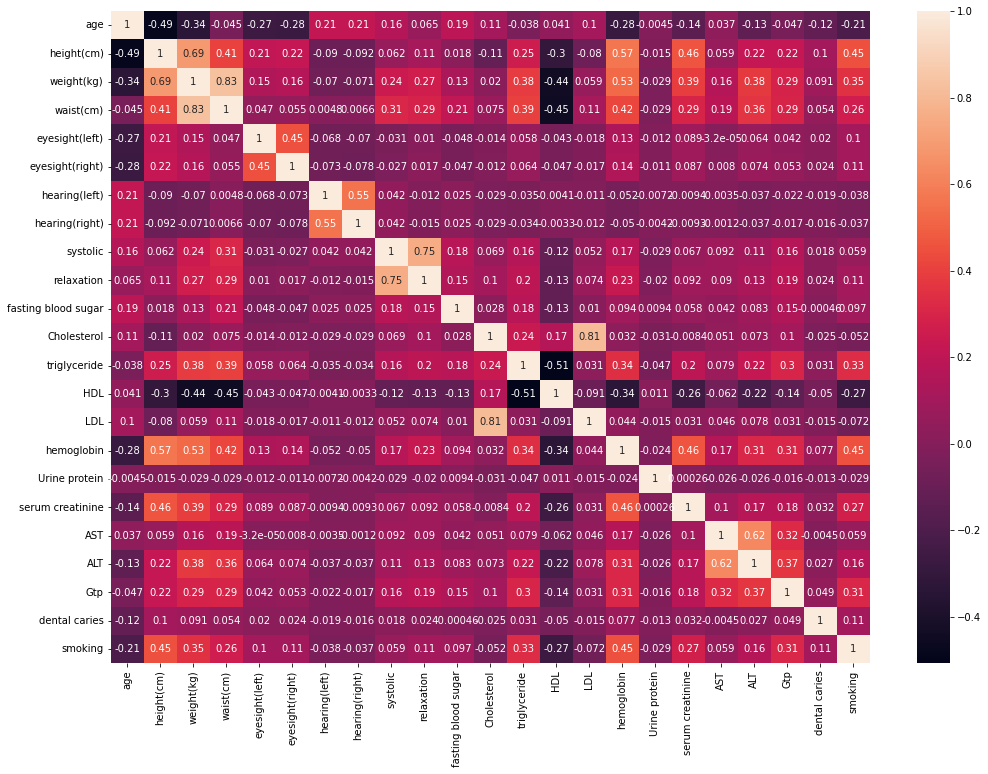

In [8]:
# 히트맵

plt.figure(figsize=(17,12))
sns.heatmap(train_df.drop(columns=["id"]).corr(), annot=True)
plt.show()

# waist & weight 0.83
# cholesterol & ldl 0.81
# relaxation & systolic 0.75

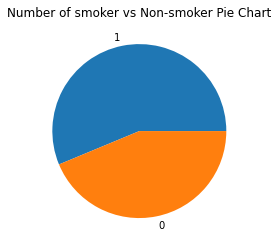

In [9]:
# y 비율

val_smoke = train_df['smoking'].value_counts()
plt.pie(val_smoke.tolist(),labels=train_df['smoking'].unique())
plt.title("Number of smoker vs Non-smoker Pie Chart")
plt.show()

In [ ]:
# feature별 y와의 상관관계 확인

for col in train_df.columns:
    sns.scatterplot(data=train_df, x=col, y='smoking')
    plt.show()

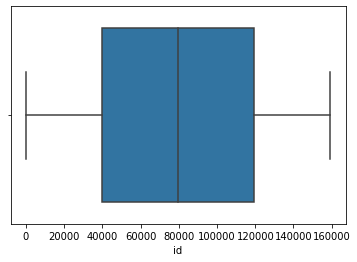

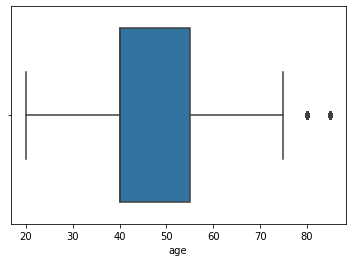

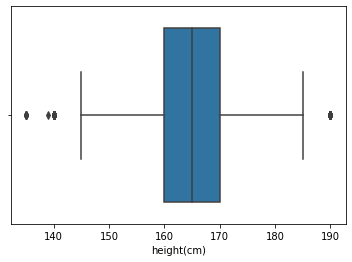

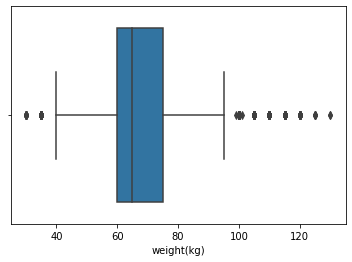

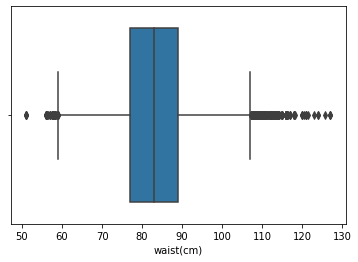

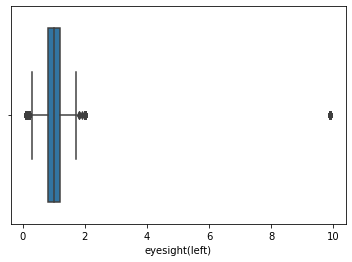

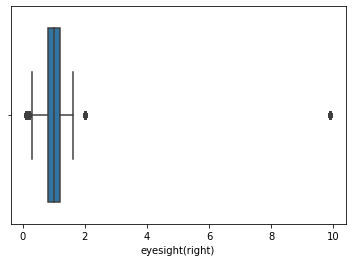

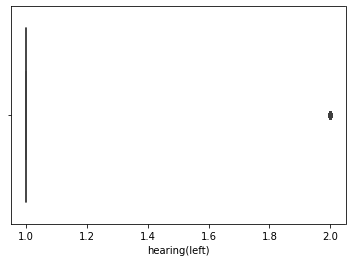

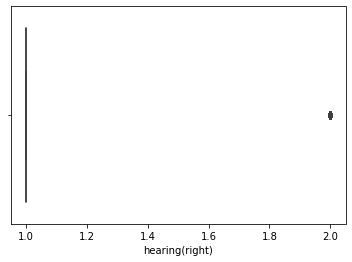

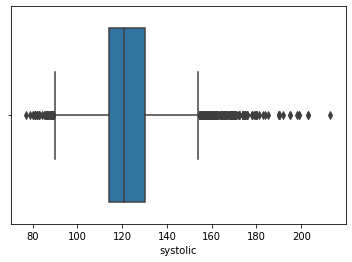

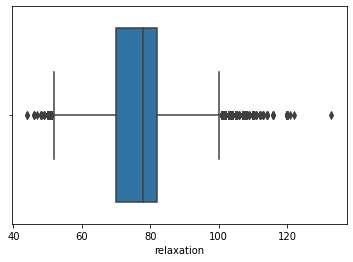

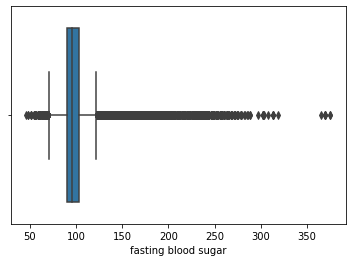

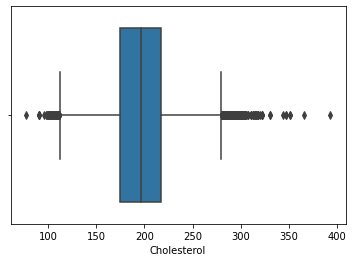

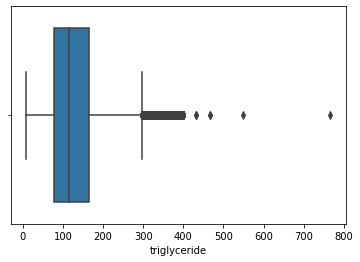

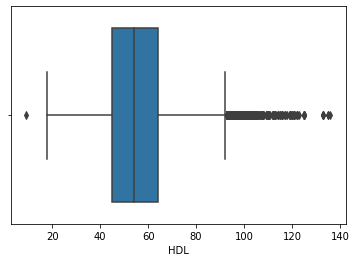

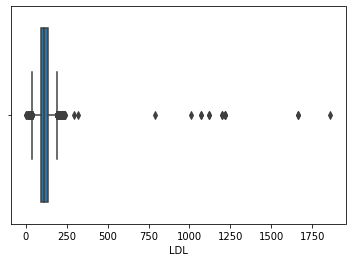

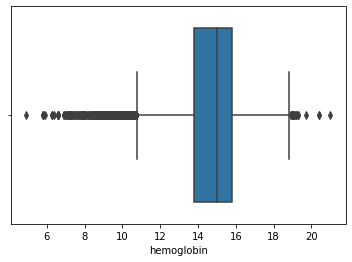

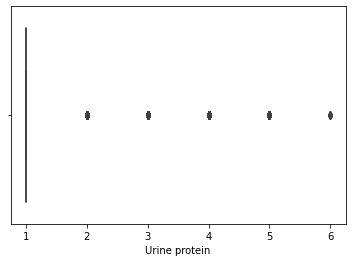

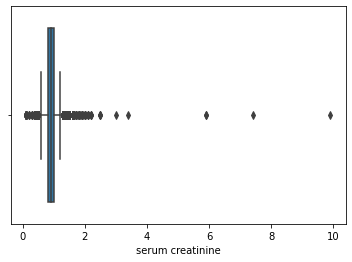

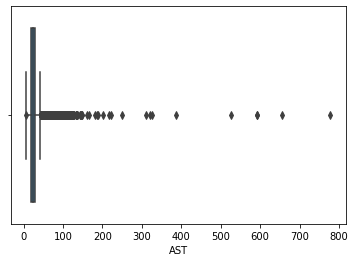

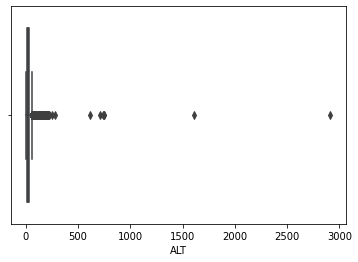

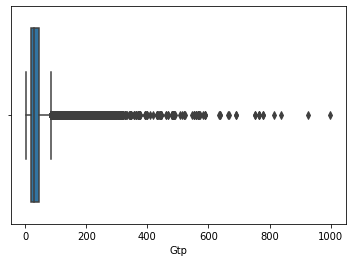

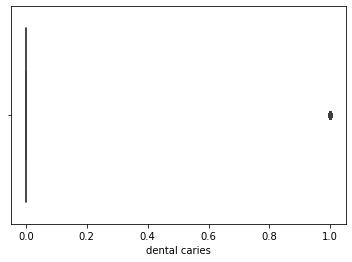

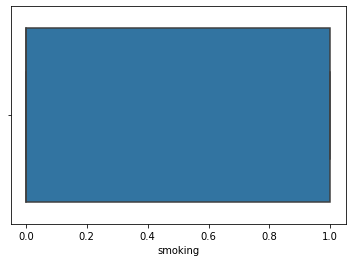

In [10]:
# 이상치 확인

for col in train_df.columns:
    sns.boxplot(data=train_df,x=col)
    plt.show()

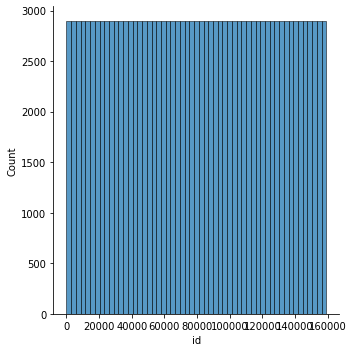

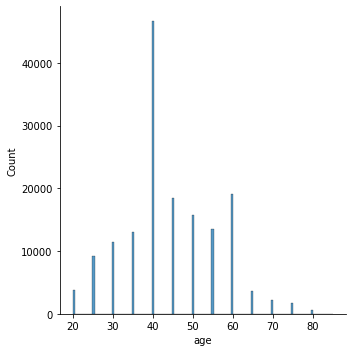

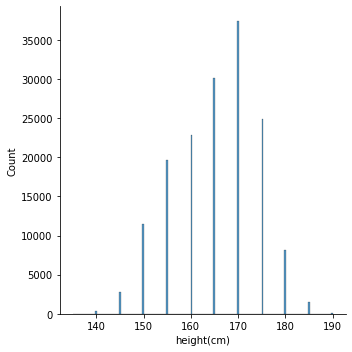

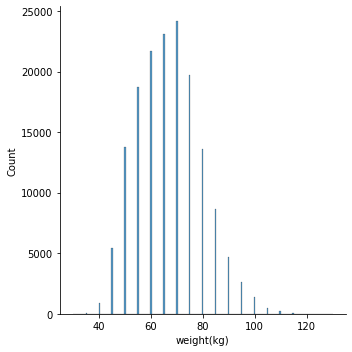

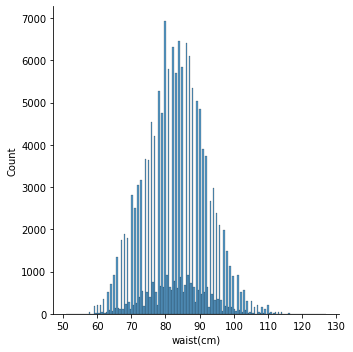

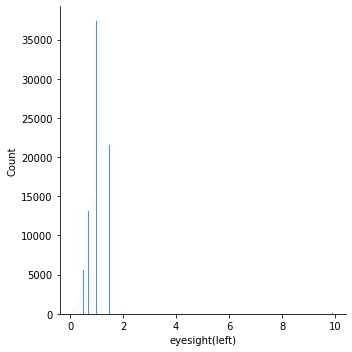

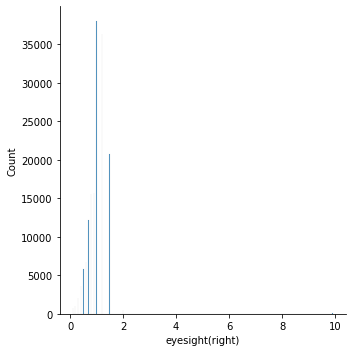

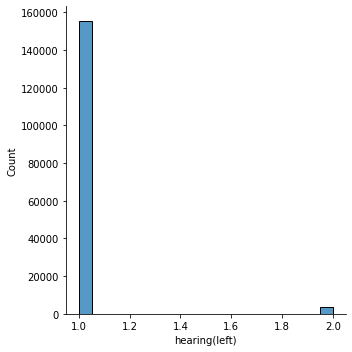

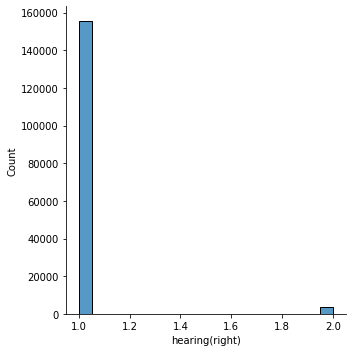

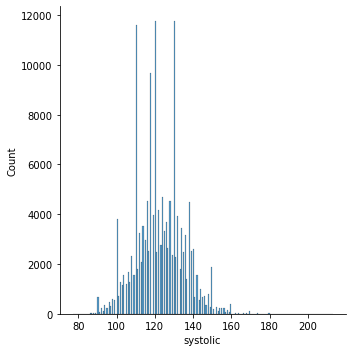

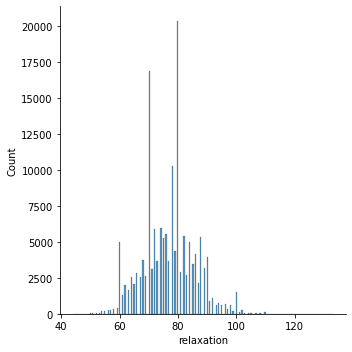

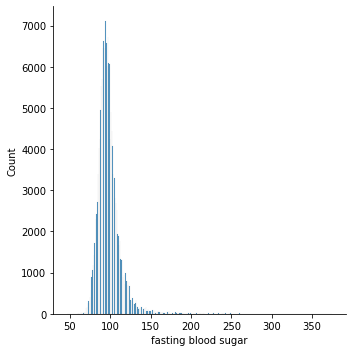

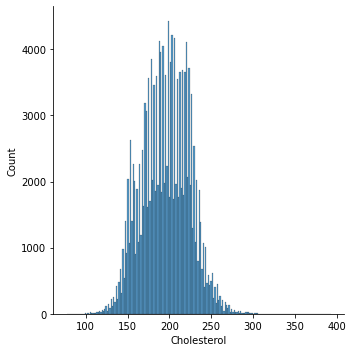

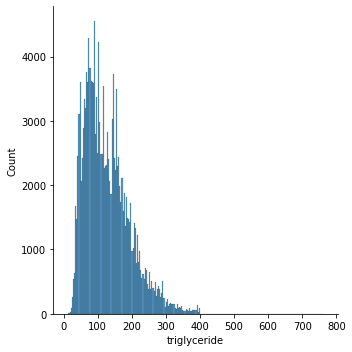

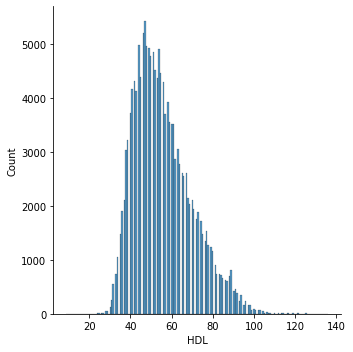

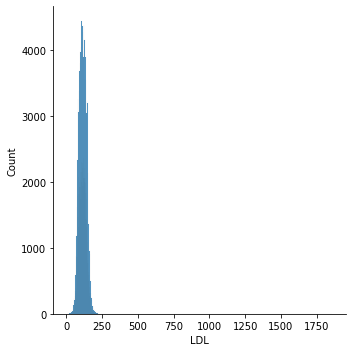

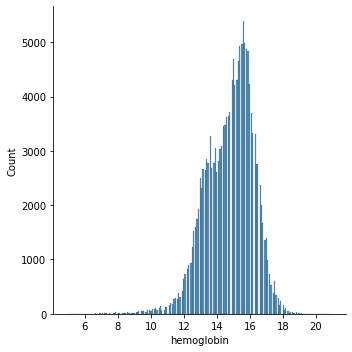

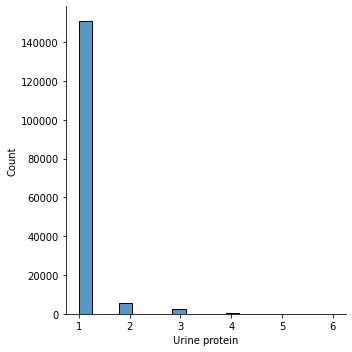

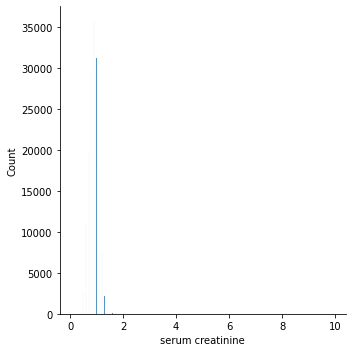

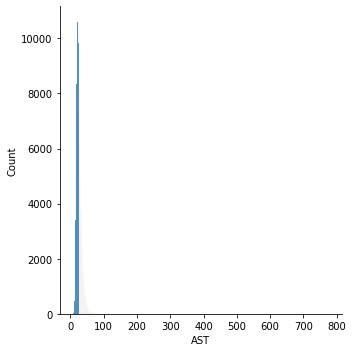

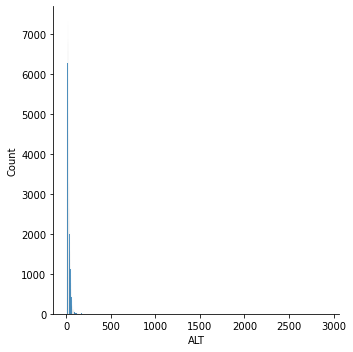

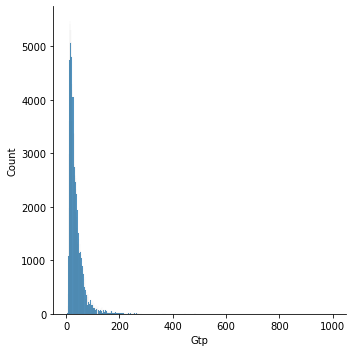

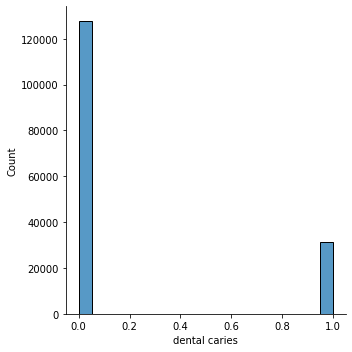

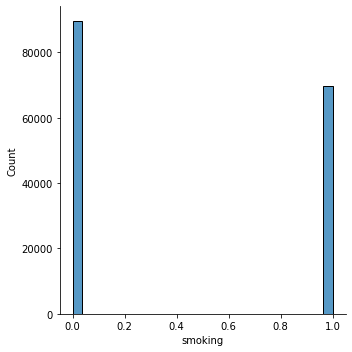

In [12]:
# 왜도 확인

for col in train_df.columns:
    sns.displot(data=train_df,x=col)
    plt.show()